In [26]:
import pandas as pd
import datetime
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import bokeh
import seaborn as sns
import pandas_profiling
import plotly
import plotly.graph_objects as go # Notwendig für Sankey Diagramm
import chart_studio.plotly as py
import pytz

In [27]:
#df= pd.read_csv("data/data1/tirol_sys_21.csv", error_bad_lines=False, sep=";", decimal=",")
#df= pd.read_csv("data/data3/synt_ohne_bat.csv", error_bad_lines=False, sep=";", parse_dates=['DateTime'])

#df= pd.read_csv("data/data1/tirol_sys_21.csv", error_bad_lines=False, sep=";", decimal=",")
#df= pd.read_csv("data/data3/synt_ohne_bat.csv", error_bad_lines=False, sep=";", parse_dates=['DateTime'])

In [28]:
##zum Einlesen der synthetischen Profile

#DF MIT MEDIAN:
#df= pd.read_csv("../data/data3/synt_mit_bat_median.csv", error_bad_lines=False, sep=",")

#Test mit Mittelwert:
df= pd.read_csv("data/data3/tirol_sys_bat_vergleich.csv", error_bad_lines=False, sep=";")

#Test mit Mean und 25% Trim oben und unten:
#df= pd.read_csv("../data/data3/synt_mit_bat_mittelwert_trimmed.csv", error_bad_lines=False, sep=",")


In [29]:
##Zum Einlesen von einzelnen Anlagen:
#df= pd.read_csv("../data/data2/tirol_sys_bat_2.csv", error_bad_lines=False, sep=";",  decimal=",")

In [30]:
df.head()

DateTime  DevWork_97 [Energy_Ws]  \
0  2017-01-01 00:05:00+01:00                     0.0   
1  2017-01-01 00:10:00+01:00                     0.0   
2  2017-01-01 00:15:00+01:00                     0.0   
3  2017-01-01 00:20:00+01:00                     0.0   
4  2017-01-01 00:25:00+01:00                     0.0   

   FromBattToConsumer_0 [Energy_Wh]  FromGenToBatt_0 [Energy_Wh]  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          0.0   
3                               0.0                          0.0   
4                               0.0                          0.0   

   FromGenToConsumer_0 [Energy_Wh]  FromGenToGrid_0 [Energy_Wh]  \
0                              0.0                          0.0   
1                              0.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   

   FromGridToConsumer_0 [Energy_Wh]  FromGrid_0 [Energy_Wh]  \
0                              49.0                    49.0   
1                              49.0                    49.0   
2                              60.0                    60.0   
3                              58.0                    58.0   
4                              33.0                    33.0   

   StateOfCharge_254 [Percent]  ToConsumer_0 [Energy_Wh]  
0                          NaN                      49.0  
1                          NaN                      49.0  
2                          NaN                      60.0  
3                          NaN                      58.0  
4                          NaN                      33.0

In [31]:
df.dtypes

DateTime                             object
DevWork_97 [Energy_Ws]              float64
FromBattToConsumer_0 [Energy_Wh]    float64
FromGenToBatt_0 [Energy_Wh]         float64
FromGenToConsumer_0 [Energy_Wh]     float64
FromGenToGrid_0 [Energy_Wh]         float64
FromGridToConsumer_0 [Energy_Wh]    float64
FromGrid_0 [Energy_Wh]              float64
StateOfCharge_254 [Percent]         float64
ToConsumer_0 [Energy_Wh]            float64
dtype: object

In [32]:

df['DateTime'] = pd.to_datetime(df['DateTime'], format="%Y-%m-%d", utc=True)
df['DateTime'] = df['DateTime'].dt.tz_convert('Europe/Berlin')

In [33]:
#RENAME COLUMNS:

df.columns = ['DateTime', 'DevWork', 'FromBatToCons', 'FromGenToBat','FromGenToCons', 'FromGenToGrid','FromGridToCons','FromGrid', 'StateOfCharge', 'ToCons']


'''
DF shape original:

DateTime                            datetime64[ns, Europe/Berlin]grou
DevWork_97 [Energy_Ws]                                    float64
FromBattToConsumer_0 [Energy_Wh]                            int64
FromGenToBatt_0 [Energy_Wh]                                 int64
FromGenToConsumer_0 [Energy_Wh]                           float64
FromGenToGrid_0 [Energy_Wh]                               float64
FromGridToConsumer_0 [Energy_Wh]                          float64
FromGrid_0 [Energy_Wh]                                    float64
ToConsumer_0 [Energy_Wh]                                  float64
dtype: object
'''

'\nDF shape original:\n\nDateTime                            datetime64[ns, Europe/Berlin]grou\nDevWork_97 [Energy_Ws]                                    float64\nFromBattToConsumer_0 [Energy_Wh]                            int64\nFromGenToBatt_0 [Energy_Wh]                                 int64\nFromGenToConsumer_0 [Energy_Wh]                           float64\nFromGenToGrid_0 [Energy_Wh]                               float64\nFromGridToConsumer_0 [Energy_Wh]                          float64\nFromGrid_0 [Energy_Wh]                                    float64\nToConsumer_0 [Energy_Wh]                                  float64\ndtype: object\n'

In [34]:
df['FromGen'] = df['FromGenToBat'] + df['FromGenToCons'] + df['FromGenToGrid'] 

In [35]:
#Pandas Profiling

In [36]:
df.head()

DateTime  DevWork  FromBatToCons  FromGenToBat  \
0 2017-01-01 00:05:00+01:00      0.0            0.0           0.0   
1 2017-01-01 00:10:00+01:00      0.0            0.0           0.0   
2 2017-01-01 00:15:00+01:00      0.0            0.0           0.0   
3 2017-01-01 00:20:00+01:00      0.0            0.0           0.0   
4 2017-01-01 00:25:00+01:00      0.0            0.0           0.0   

   FromGenToCons  FromGenToGrid  FromGridToCons  FromGrid  StateOfCharge  \
0            0.0            0.0            49.0      49.0            NaN   
1            0.0            0.0            49.0      49.0            NaN   
2            0.0            0.0            60.0      60.0            NaN   
3            0.0            0.0            58.0      58.0            NaN   
4            0.0            0.0            33.0      33.0            NaN   

   ToCons  FromGen  
0    49.0      0.0  
1    49.0      0.0  
2    60.0      0.0  
3    58.0      0.0  
4    33.0      0.0

In [37]:
df.dtypes

DateTime          datetime64[ns, Europe/Berlin]
DevWork                                 float64
FromBatToCons                           float64
FromGenToBat                            float64
FromGenToCons                           float64
FromGenToGrid                           float64
FromGridToCons                          float64
FromGrid                                float64
StateOfCharge                           float64
ToCons                                  float64
FromGen                                 float64
dtype: object

In [38]:
#df['FromBatToCons'] = df['FromBatToCons'].astype(float)

In [39]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report  Synthetisches LP ohne Batterie")

In [40]:
#profile

# Überschussmenge Monat/Tag visualisieren:
Es wird ein Subset aus der Überschussmenge gebildet (jeweils aggregiert nach Monat und Tag) Außerdem erfolgt noch eine Umrechnung auf kWh um eine bessere Vergleichbarkeit zu ermöglichen.

In [41]:
#hier werden die Daten nach Montaen und Tagen
überschuss_month = df.groupby(pd.Grouper(key='DateTime',freq='M')).agg({'FromGenToGrid':'sum', 'FromGen':'sum'}).reset_index()
überschuss_day = df.groupby(pd.Grouper(key='DateTime',freq='d')).agg({'FromGenToGrid':'sum'}).reset_index()

In [42]:
#Damit alle Werte nach Monaten ausgewertet werden können + Umwandlung in kWh

df_aggr=df.groupby(pd.Grouper(key='DateTime',freq='M')).sum().reset_index()
df_aggr['Datum'] = pd.to_datetime(df_aggr['DateTime']).dt.strftime('%Y-%m')
df_aggr['Jahr'] = pd.to_datetime(df_aggr['DateTime']).dt.strftime('%Y')
df_aggr['Monat'] = pd.to_datetime(df_aggr['DateTime']).dt.strftime('%m')

#da die Features FromGenToBat  und FromBatToCons nicht in allen Anlagen vorhanden ist:
try:
    df_aggr["FromBatToCons"] = df_aggr["FromBatToCons"]/1000
except:
        pass
try:
    df_aggr["FromGenToBat"] = df_aggr["FromGenToBat"]/1000
except:
        pass
    
df_aggr["FromGenToCons"] = df_aggr["FromGenToCons"]/1000
df_aggr["FromGenToGrid"] = df_aggr["FromGenToGrid"]/1000
df_aggr["FromGridToCons"] = df_aggr["FromGridToCons"]/1000
df_aggr["FromGrid"] = df_aggr["FromGrid"]/1000
df_aggr["ToCons"] = df_aggr["ToCons"]/1000
df_aggr["FromGen"] = df_aggr["FromGen"]/1000
del df_aggr['DateTime']
del df_aggr['DevWork']

In [43]:
df_aggr.head()

FromBatToCons  FromGenToBat  FromGenToCons  FromGenToGrid  FromGridToCons  \
0       23.78575      25.93306       68.55543        3.60345      1598.24365   
1      112.75558     122.41131      189.81121       69.35983       513.10195   
2      194.59258     216.49075      256.43989      202.98222       264.45195   
3      197.56621     218.83435      289.46281      199.89252       206.24843   
4      217.44428     238.70764      369.66058      261.76542       180.24005   

   FromGrid  StateOfCharge      ToCons    FromGen    Datum  Jahr Monat  
0  1598.264       24064.00  1690.58561   98.09194  2017-01  2017    01  
1   513.204      158119.47   815.67058  381.58235  2017-02  2017    02  
2   264.452      285766.47   715.48651  675.91286  2017-03  2017    03  
3   206.570      301972.44   693.27963  708.18968  2017-04  2017    04  
4   180.357      393584.42   767.34730  870.13364  2017-05  2017    05

In [44]:
#Jahresverbrauch an Strom:

verbr_monat = df_aggr.groupby(df_aggr.Datum ,as_index=True).sum().reset_index()
verbr_jahr = df_aggr.groupby(df_aggr.Jahr ,as_index=True).sum().reset_index()

In [45]:
verbr_jahr
#verbr_jahr.to_csv('Energiemenge_gesamt_Jahr_snyt_mittelwert.csv')

Jahr  FromBatToCons  FromGenToBat  FromGenToCons  FromGenToGrid  \
0  2017     1860.53308    2036.38081     3068.36910     1505.55064   
1  2018     1999.15247    2165.54323     3215.32819     1420.22217   
2  2019     1814.39734    1993.19808     3177.32107     1182.00839   
3  2020     1433.68420    1615.79300     3907.32614     1089.97839   
4  2021      160.85989     173.52335      368.55168       64.76952   

   FromGridToCons    FromGrid  StateOfCharge       ToCons     FromGen  
0      4954.51826  4956.94700     3014350.49   9883.43947  6610.30055  
1      3925.96293  3931.75198     2977463.95   9140.45969  6801.09359  
2      5559.49539  5566.93104     2540843.61  10551.23166  6352.52754  
3      8371.83677  8385.58504     1866090.86  13712.86249  6613.09753  
4      1896.85814  1904.92000      258148.00   2426.27139   606.84455

In [46]:
verbr_jahr_round=verbr_jahr.round(2)

In [47]:
#verbr_jahr_round.to_csv('Energiemenge_gesamt_Jahr_snyt_round_median.csv')
verbr_jahr_round

Jahr  FromBatToCons  FromGenToBat  FromGenToCons  FromGenToGrid  \
0  2017        1860.53       2036.38        3068.37        1505.55   
1  2018        1999.15       2165.54        3215.33        1420.22   
2  2019        1814.40       1993.20        3177.32        1182.01   
3  2020        1433.68       1615.79        3907.33        1089.98   
4  2021         160.86        173.52         368.55          64.77   

   FromGridToCons  FromGrid  StateOfCharge    ToCons  FromGen  
0         4954.52   4956.95     3014350.49   9883.44  6610.30  
1         3925.96   3931.75     2977463.95   9140.46  6801.09  
2         5559.50   5566.93     2540843.61  10551.23  6352.53  
3         8371.84   8385.59     1866090.86  13712.86  6613.10  
4         1896.86   1904.92      258148.00   2426.27   606.84

In [48]:
#Kontrolle
#verbr_monat.head()

In [49]:
#verbr_monat.distplot('FromGen','ToCons')

In [50]:
#überschuss_month['DateTime'] = pd.to_datetime(überschuss_month['DateTime'], format="%Y-%m")

überschuss_month['Datum'] = pd.to_datetime(überschuss_month['DateTime']).dt.strftime('%Y-%m')
überschuss_month['Jahr'] = pd.to_datetime(überschuss_month['DateTime']).dt.strftime('%Y')
überschuss_month['Monat'] = pd.to_datetime(überschuss_month['DateTime']).dt.strftime('%m')

In [51]:
#überschuss_month['FromGenToGrid'] = (überschuss_month['FromGenToGrid']/1000)
del überschuss_month['DateTime']

In [52]:
überschuss_month["FromGenToGrid"] = (überschuss_month["FromGenToGrid"]/1000)
überschuss_month["FromGen"] = (überschuss_month["FromGen"]/1000)

In [53]:
indexNames = überschuss_month[überschuss_month['Jahr'] == '2021'].index
überschuss_month.drop(indexNames , inplace=True)
#kontrolle:
überschuss_month.head()

FromGenToGrid    FromGen    Datum  Jahr Monat
0        3.60345   98.09194  2017-01  2017    01
1       69.35983  381.58235  2017-02  2017    02
2      202.98222  675.91286  2017-03  2017    03
3      199.89252  708.18968  2017-04  2017    04
4      261.76542  870.13364  2017-05  2017    05

In [54]:
#nun werden die Daten pivotiert, damit später die Jahre untereinander verglichen werden können
piv = pd.pivot_table(überschuss_month, index=['Monat'], columns=['Jahr'], values=['FromGenToGrid', 'FromGen'])
piv.dtypes

               Jahr
FromGen        2017    float64
               2018    float64
               2019    float64
               2020    float64
FromGenToGrid  2017    float64
               2018    float64
               2019    float64
               2020    float64
dtype: object

In [55]:
#piv.reset_index()
#Kontrolle:
#piv.head()

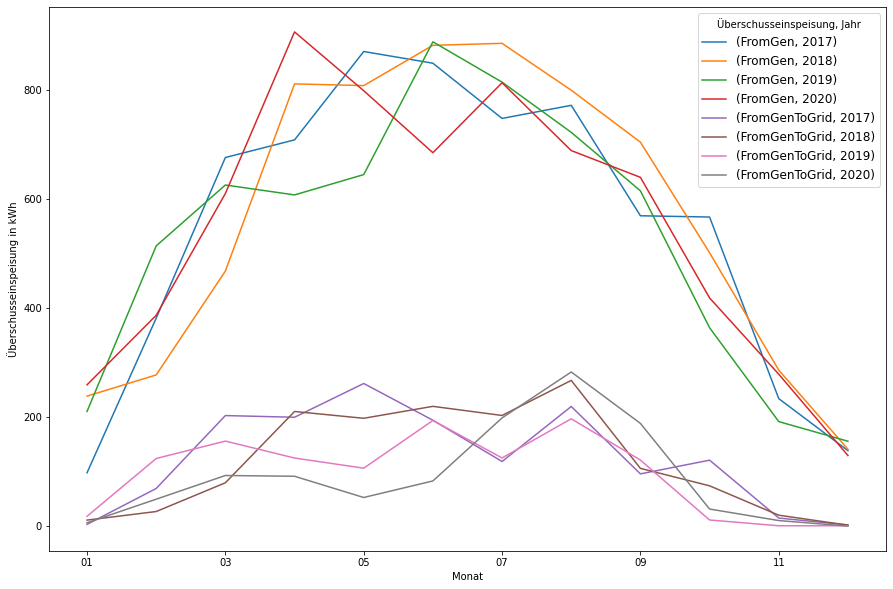

In [56]:
piv.plot(figsize=(15,10))
plt.xlabel("Monat")
plt.ylabel("Überschusseinspeisung in kWh")
legend = plt.legend(title="Überschusseinspeisung, Jahr",
                    loc=1, fontsize='large', fancybox=True)

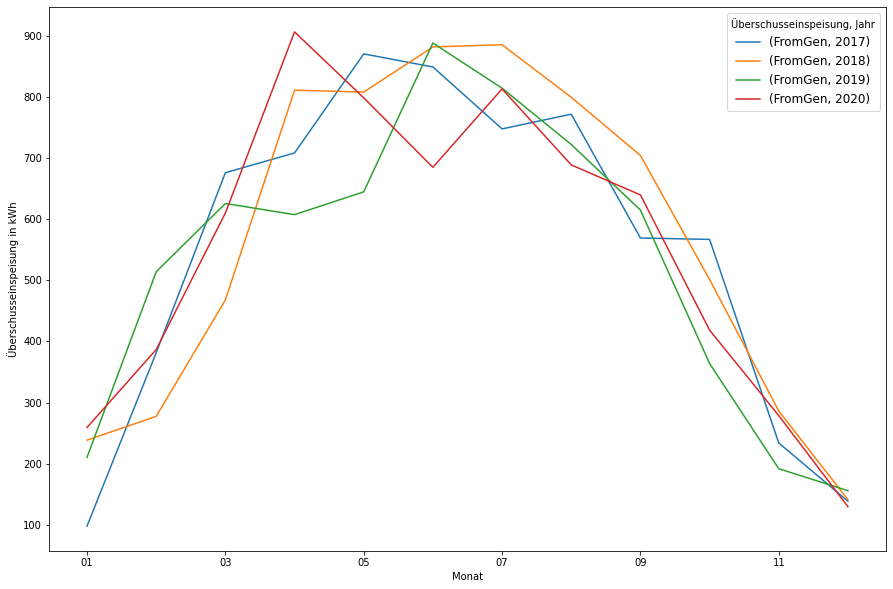

In [57]:
piv['FromGen','2017'].plot(figsize=(15,10))
piv['FromGen','2018'].plot(figsize=(15,10))
piv['FromGen','2019'].plot(figsize=(15,10))
piv['FromGen','2020'].plot(figsize=(15,10))
plt.xlabel("Monat") 
plt.ylabel("Überschusseinspeisung in kWh")
legend = plt.legend(title="Überschusseinspeisung, Jahr",
                    loc=1, fontsize='large', fancybox=True)

In [58]:
#Diese Grafik visualisiert, wie viel kWh Pro Jahr von der PV-Anlage ins Netz eingespeist werden (saisonaler Vergleich)
#Diese Menge an Überschuss ist das Potential, das für den Betrieb einen Elektrofahrzeuges genutzt werden könnte.

In [59]:
#piv.head(200)
#piv.to_csv('pivot_test.csv', index = False)

In [60]:
#Nachfolgend werden die Überschussmengen, welche ins Netz eingespeist werden, anhand der Menge verglichen. Dazu wurden Violin und Boxplots verwendet.
#Speziell der erste Violinplot wäre aus Sicht des Autors optisch interessant gewesen. Da die Eigenschaft des Violinplots allerdings die Aussagekraft verfälscht (der Violinplot läuft im negativen Wertebreeich aus), wurde für die finale Arbeit der Boxpot benutzt.

In [61]:
#Falls nur FromGenToGrid wieder in piv sein soll:
#piv = pd.pivot_table(überschuss_month, index=['Monat'], columns=['Jahr'], values=['FromGenToGrid'])

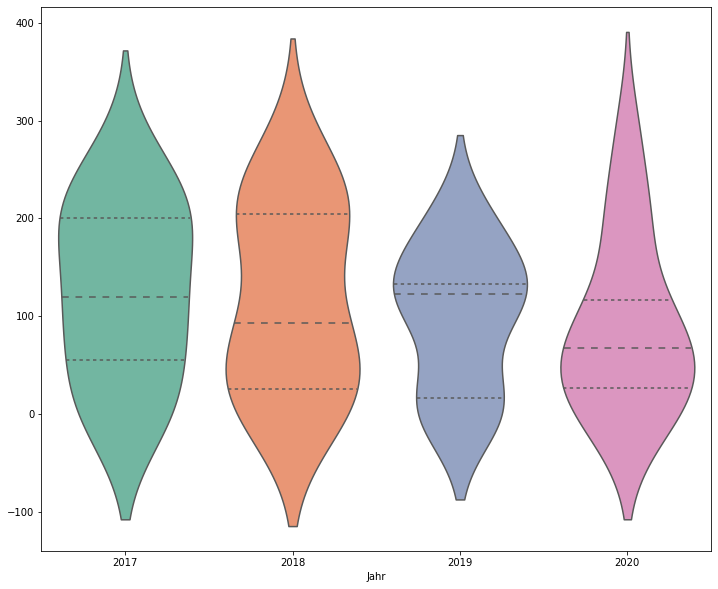

In [62]:
plt.figure(figsize=(12, 10))
ax = sns.violinplot(#x="Monat", y="FromGenToGrid",
                    data=piv["FromGenToGrid"], split=True, palette="Set2", title="abc",
                    scale="count", inner="quartile")


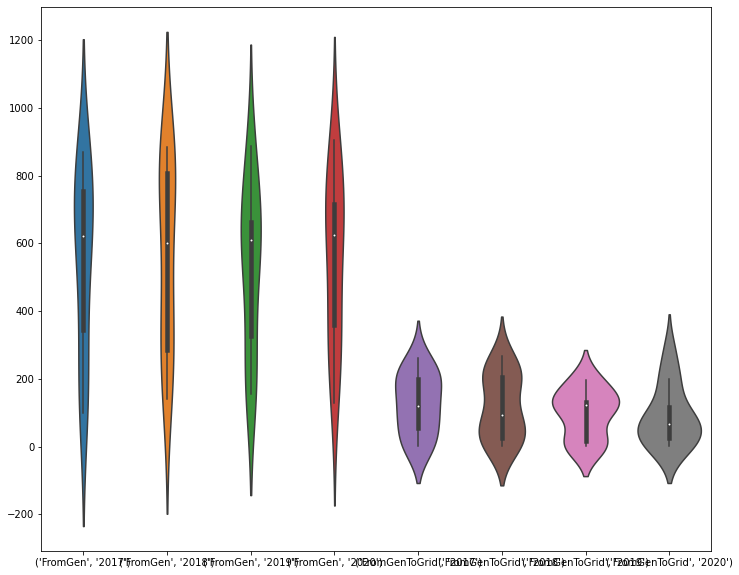

In [63]:
plt.figure(figsize=(12, 10))
ax = sns.violinplot(data=piv, figsize=(200, 100))

Text(0, 0.5, 'Überschusseinspeisung in kWh pro Monat')

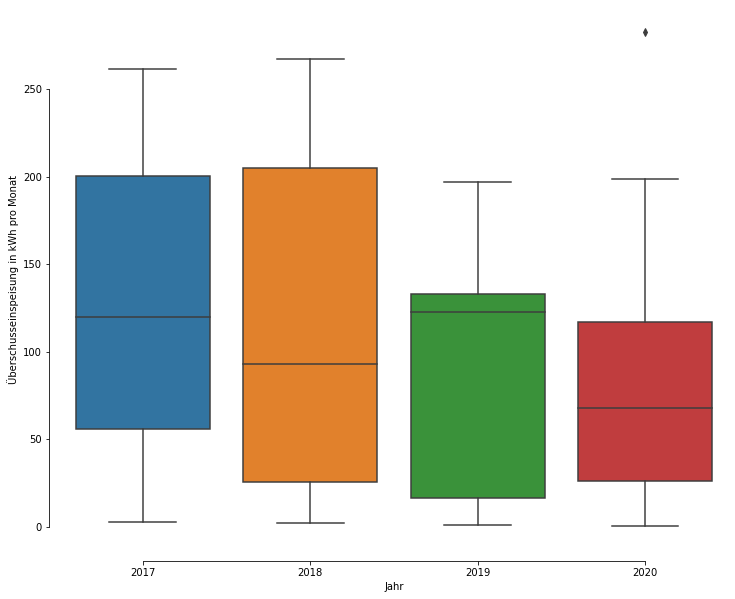

In [64]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=piv["FromGenToGrid"])
sns.despine(offset=10, trim=True)
plt.xlabel("Jahr") 
plt.ylabel("Überschusseinspeisung in kWh pro Monat")

Text(0, 0.5, 'Überschusseinspeisung in kWh pro Monat')

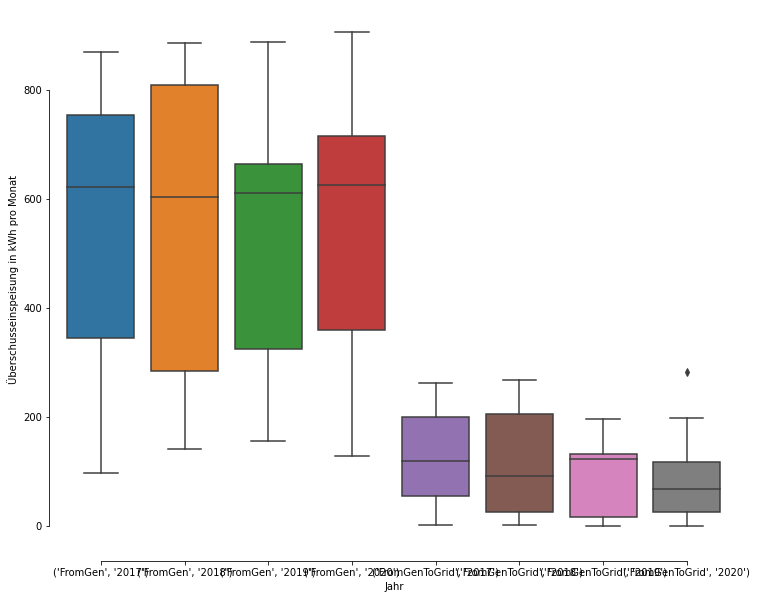

In [65]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=piv)
sns.despine(offset=10, trim=True)
plt.xlabel("Jahr") 
plt.ylabel("Überschusseinspeisung in kWh pro Monat")


In [66]:
#Verbrauch und Erzeugung:

In [67]:
df2=verbr_monat
df2['Jahr'] = pd.to_datetime(verbr_monat['Datum']).dt.strftime('%Y')
df2['Monat'] = pd.to_datetime(verbr_monat['Datum']).dt.strftime('%m')

In [68]:
#Kontrolle
#df2.head()

In [69]:
indexNames = df2[df2['Jahr'] == '2021'].index
df2.drop(indexNames , inplace=True)
#kontrolle:
#df2.head()

In [70]:
piv2= pd.pivot_table(df2, index=['Monat'], columns=['Jahr'],
values=['FromBatToCons','FromGenToBat','FromGenToCons','FromGenToGrid','FromGridToCons','FromGrid','ToCons','FromGen'])

In [71]:
#Es wurde ein Durchschnitt aus den 4 Jahren gebildet und diese hier miteinander verglichen.

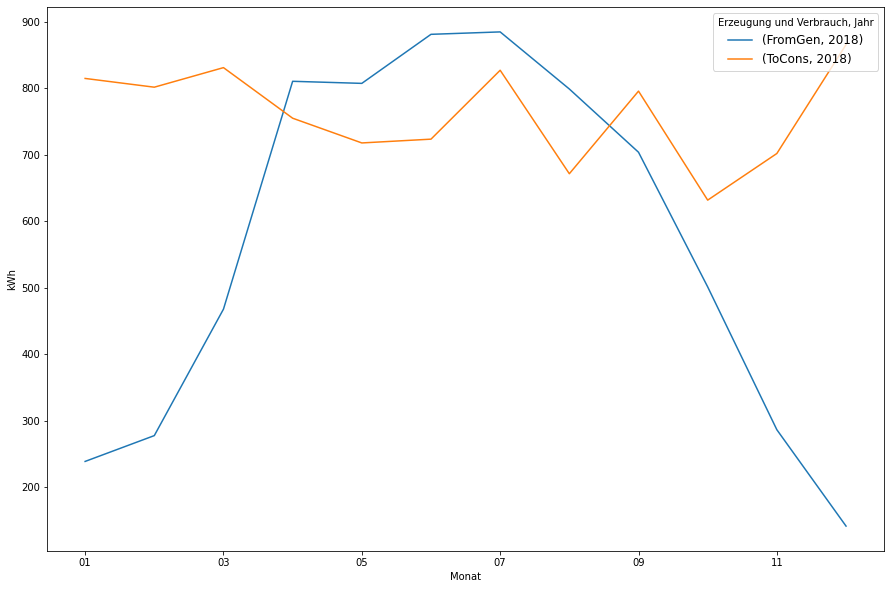

In [72]:
piv2['FromGen','2018'].plot(figsize=(15,10))
piv2['ToCons','2018'].plot(figsize=(15,10))
plt.xlabel("Monat") 
plt.ylabel("kWh")
legend = plt.legend(title="Erzeugung und Verbrauch, Jahr",
                    loc=1, fontsize='large', fancybox=True)

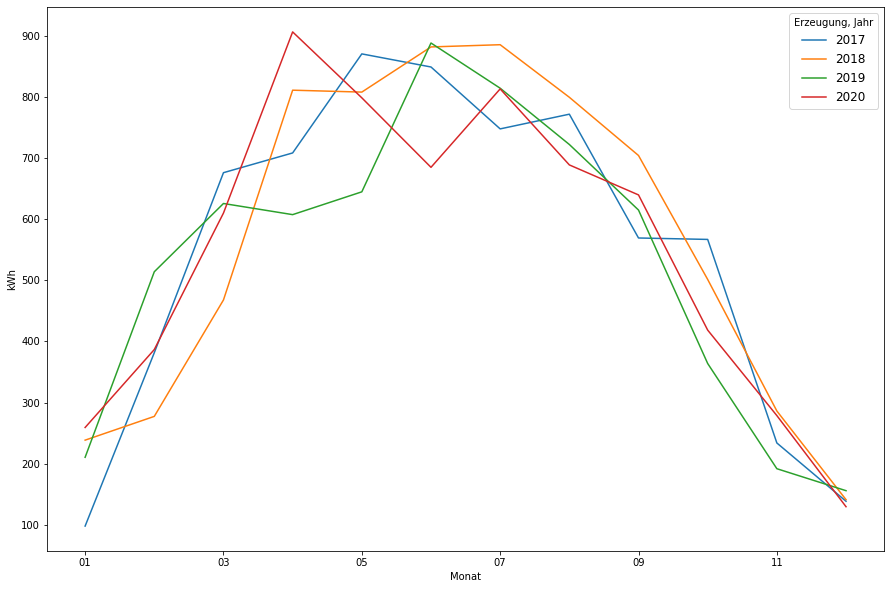

In [73]:
piv2['FromGen'].plot(figsize=(15,10))
plt.xlabel("Monat") 
plt.ylabel("kWh")
legend = plt.legend(title="Erzeugung, Jahr",
                    loc=1, fontsize='large', fancybox=True)

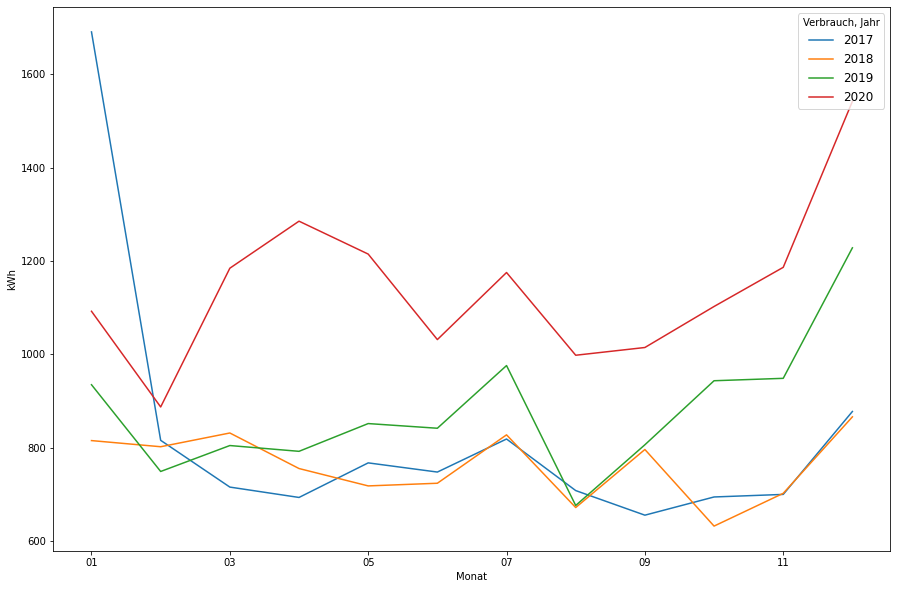

In [74]:
piv2['ToCons'].plot(figsize=(15,10))
plt.xlabel("Monat") 
plt.ylabel("kWh")
legend = plt.legend(title="Verbrauch, Jahr",
                    loc=1, fontsize='large', fancybox=True)

In [75]:
#Woche im Sommmer

start_date="2019-09-01"
end_date="2019-09-07"

#start_date="2019-08-18"
#end_date="2019-08-24"

zeit = (df['DateTime'] > start_date) & (df['DateTime'] <= end_date)
zeit = df.loc[zeit]

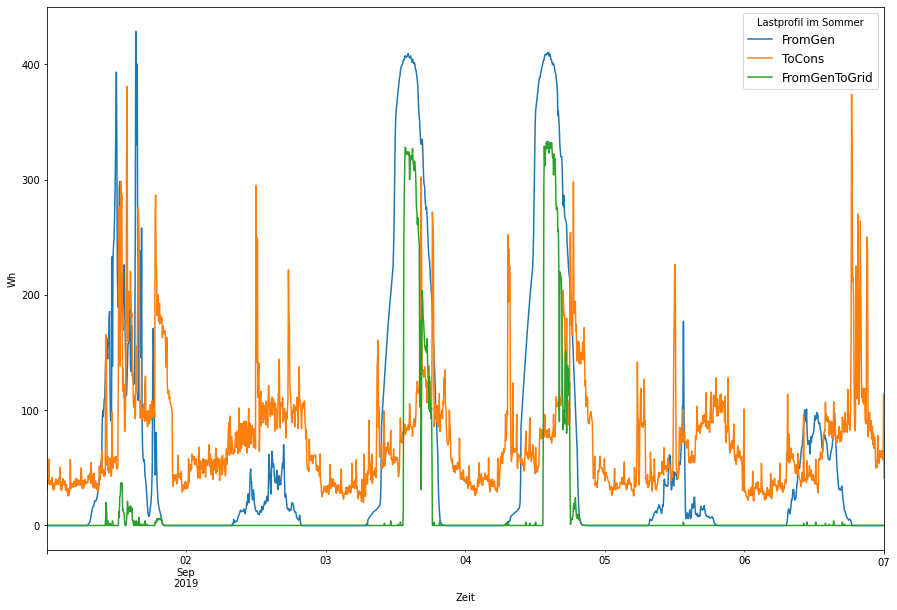

In [76]:
zeit.plot(figsize=(15,10),x="DateTime", y=["FromGen", "ToCons", 'FromGenToGrid'])
#df.plot(x="DateTime", y=["FromGen", "ToCons"])
plt.xlabel("Zeit") 
plt.ylabel("Wh")
legend = plt.legend(title="Lastprofil im Sommer",
                    loc=1, fontsize='large', fancybox=True)

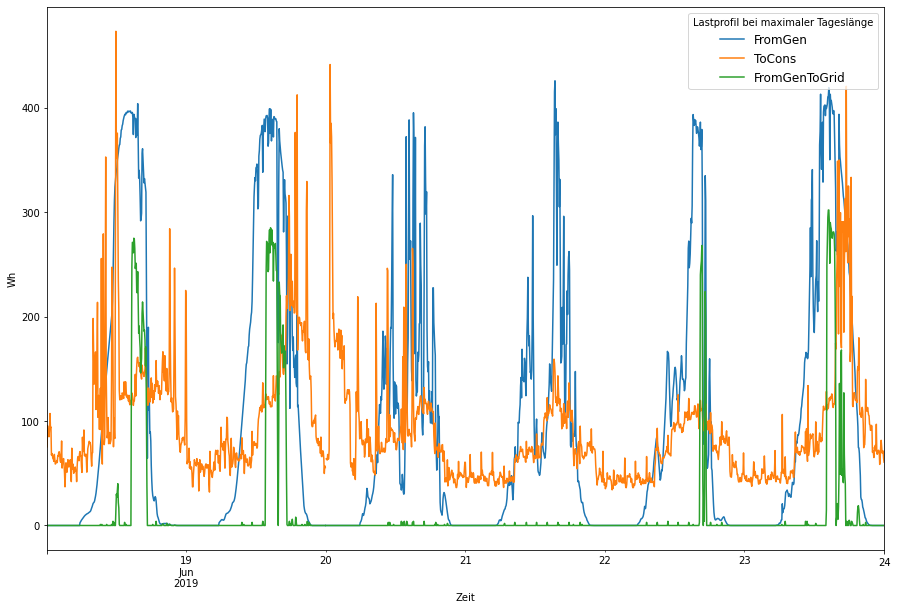

In [77]:
#Woche bei maximaler Tageslänge (Schlechtwetter)
start_date="2019-06-18"
end_date="2019-06-24"

#start_date="2019-08-18"
#end_date="2019-08-24"

zeit = (df['DateTime'] > start_date) & (df['DateTime'] <= end_date)
zeit = df.loc[zeit]

zeit.plot(figsize=(15,10),x="DateTime", y=["FromGen", "ToCons", 'FromGenToGrid'])
#df.plot(x="DateTime", y=["FromGen", "ToCons"])
plt.xlabel("Zeit") 
plt.ylabel("Wh")
legend = plt.legend(title="Lastprofil bei maximaler Tageslänge",
                    loc=1, fontsize='large', fancybox=True)

In [78]:
#kürzester Tag 
start_date="2019-12-16"
end_date="2019-12-23"
zeit = (df['DateTime'] > start_date) & (df['DateTime'] <= end_date)
zeit = df.loc[zeit]

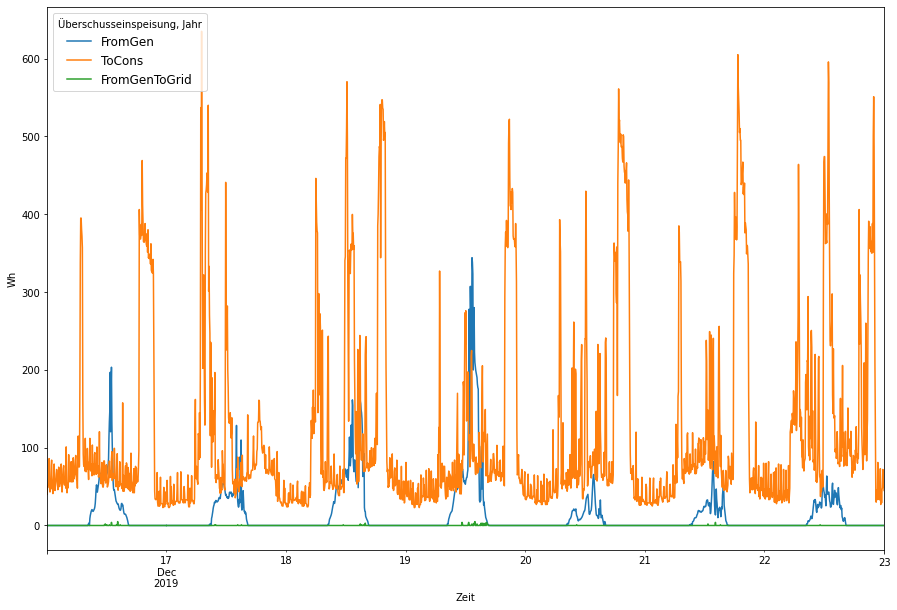

In [79]:
zeit.plot(figsize=(15,10),x="DateTime", y=["FromGen", "ToCons", 'FromGenToGrid'])
#df.plot(x="DateTime", y=["FromGen", "ToCons"])
plt.xlabel("Zeit") 
plt.ylabel("Wh")
legend = plt.legend(title="Überschusseinspeisung, Jahr",
                    loc=2, fontsize='large', fancybox=True)

In [80]:
#Hier ist eine übersicht, über die erzeugungssschwächste Zeit im Jahr ersichtlich.
#Anhand der historischen Wetterdaten von timeanddate.de lässt sich erkennen, dass gerade am 21. und 22.12 sehr schlechte Wetterbedingunen herrschten. Außerdem fallen beide Tage auf ein Wochenende, was den Stromverbrauch sichtlich erhöht.
#Diese Kombination aus Wintersonnenwende und schlechtem Wetter zeigt, dass zu dieser Zeit quasi keine Erzeugung stattfindet


#https://www.timeanddate.de/wetter/oesterreich/innsbruck/rueckblick?month=12&year=2019




In [81]:
# Differenz Erzeugung/Bedarf pro Tag:

In [82]:
tageswerte = df.groupby(pd.Grouper(key='DateTime',freq='d')).agg({'FromGen':'sum'},{'FromGen':'sum'}).reset_index()

In [83]:
df_tag=df.groupby(pd.Grouper(key='DateTime',freq='d')).sum().reset_index()

df_tag["Überschuss"] = df_tag["FromGen"]-df_tag["ToCons"]


df_tag['Datum'] = pd.to_datetime(df_tag['DateTime']).dt.strftime('%Y-%m-%d')
df_tag['Jahr'] = pd.to_datetime(df_tag['DateTime']).dt.strftime('%Y')
df_tag['Monat'] = pd.to_datetime(df_tag['DateTime']).dt.strftime('%m')
df_tag['Tag'] = pd.to_datetime(df_tag['DateTime']).dt.strftime('%d')

#da die Features FromGenToBat  und FromBatToCons nicht in allen Anlagen vorhanden ist:
try:
    df_tag["FromBatToCons"] = df_tag["FromBatToCons"]/1000
except:
        pass
try:
    df_tag["FromGenToBat"] = df_tag["FromGenToBat"]/1000
except:
        pass
    
df_tag["FromGenToCons"] = df_tag["FromGenToCons"]/1000
df_tag["FromGenToGrid"] = df_tag["FromGenToGrid"]/1000
df_tag["FromGridToCons"] = df_tag["FromGridToCons"]/1000
df_tag["FromGrid"] = df_tag["FromGrid"]/1000
df_tag["ToCons"] = df_tag["ToCons"]/1000
df_tag["FromGen"] = df_tag["FromGen"]/1000
df_tag["Überschuss"]= df_tag["Überschuss"]/1000
del df_tag['DateTime']
del df_tag['DevWork']
try:
    del df_tag['StateOfCharge']
except:
    pass


In [84]:
#Kontrolle
#df_tag.head()

In [85]:
#Der Tag, an dem der größte Erzeugungsüberschuss stattfand:

In [86]:
df_tag.loc[df_tag['Überschuss'].idxmax()]

FromBatToCons        2.51234
FromGenToBat          9.7257
FromGenToCons        8.12456
FromGenToGrid       19.13722
FromGridToCons         3.145
FromGrid               3.145
ToCons              13.78186
FromGen             36.98748
Überschuss          23.20562
Datum             2018-08-26
Jahr                    2018
Monat                     08
Tag                       26
Name: 602, dtype: object

In [87]:
#Der Tag, an dem die größte Diskrepanz zwischen Verbrauch und Erzeugung lag:

In [88]:
df_tag.loc[df_tag['Überschuss'].idxmin()]

FromBatToCons            0.0
FromGenToBat             0.0
FromGenToCons        0.83768
FromGenToGrid            0.0
FromGridToCons       114.743
FromGrid             114.743
ToCons             115.58072
FromGen              0.83768
Überschuss        -114.74304
Datum             2020-12-25
Jahr                    2020
Monat                     12
Tag                       25
Name: 1454, dtype: object

In [89]:
'''
#GO SIND AUSKOMMENTIERT, weil sie sehr rechensintensiv bei der Anzeige sind in großen Mengen und die Performance stören

import plotly.graph_objects as go
import numpy as np

x = df_tag["Datum"]
y = df_tag["Überschuss"]

fig = go.Figure(data=go.Scatter(x=x, y=y), layout_xaxis_range=["2017-01-01", "2020-12-31"])

fig.add_shape(type='line',
                x0=min(x),
                y0=0,
                x1=max(x),
                y1=0,
                line=dict(color='Red',),
                xref='x',
                #yref='y'
)

fig.show()
'''

'\n#GO SIND AUSKOMMENTIERT, weil sie sehr rechensintensiv bei der Anzeige sind in großen Mengen und die Performance stören\n\nimport plotly.graph_objects as go\nimport numpy as np\n\nx = df_tag["Datum"]\ny = df_tag["Überschuss"]\n\nfig = go.Figure(data=go.Scatter(x=x, y=y), layout_xaxis_range=["2017-01-01", "2020-12-31"])\n\nfig.add_shape(type=\'line\',\n                x0=min(x),\n                y0=0,\n                x1=max(x),\n                y1=0,\n                line=dict(color=\'Red\',),\n                xref=\'x\',\n                #yref=\'y\'\n)\n\nfig.show()\n'

In [90]:
''' ähnliches Diagamm wie oben, jedoch grafisch weniger ausgearbeitet, deshalb nicht notwendig

df_tag.plot(figsize=(15,10),x="Datum", y=["Überschuss"])


#df.plot(x="DateTime", y=["FromGen", "ToCons"])
plt.xlabel("Zeit") 
plt.ylabel("kWh")
legend = plt.legend(title="Erzeugungsüberschuss pro Tag:",
                    loc=2, fontsize='large', fancybox=True)
                    
'''

' ähnliches Diagamm wie oben, jedoch grafisch weniger ausgearbeitet, deshalb nicht notwendig\n\ndf_tag.plot(figsize=(15,10),x="Datum", y=["Überschuss"])\n\n\n#df.plot(x="DateTime", y=["FromGen", "ToCons"])\nplt.xlabel("Zeit") \nplt.ylabel("kWh")\nlegend = plt.legend(title="Erzeugungsüberschuss pro Tag:",\n                    loc=2, fontsize=\'large\', fancybox=True)\n                    \n'

In [91]:
# Barplot der monatlichen Überschüsse bzw. Mindermengen:

In [92]:
df_tag2=df_tag.groupby(pd.Grouper(key='Datum')).sum().reset_index()

In [93]:
#df_tag2=df_mon
df_tag2['Datum'] = pd.to_datetime(df_tag2['Datum']).dt.strftime('%Y-%m')

In [94]:
#Kontrolle
#df_mon.dtypes
#df_tag2.head()

In [95]:
dfx = df_tag2.groupby(df_tag2.Datum, as_index=True).sum().reset_index()

In [96]:
#dfx["Datum"]=dfx[""]"-"dfx[""]
#dfx.head()

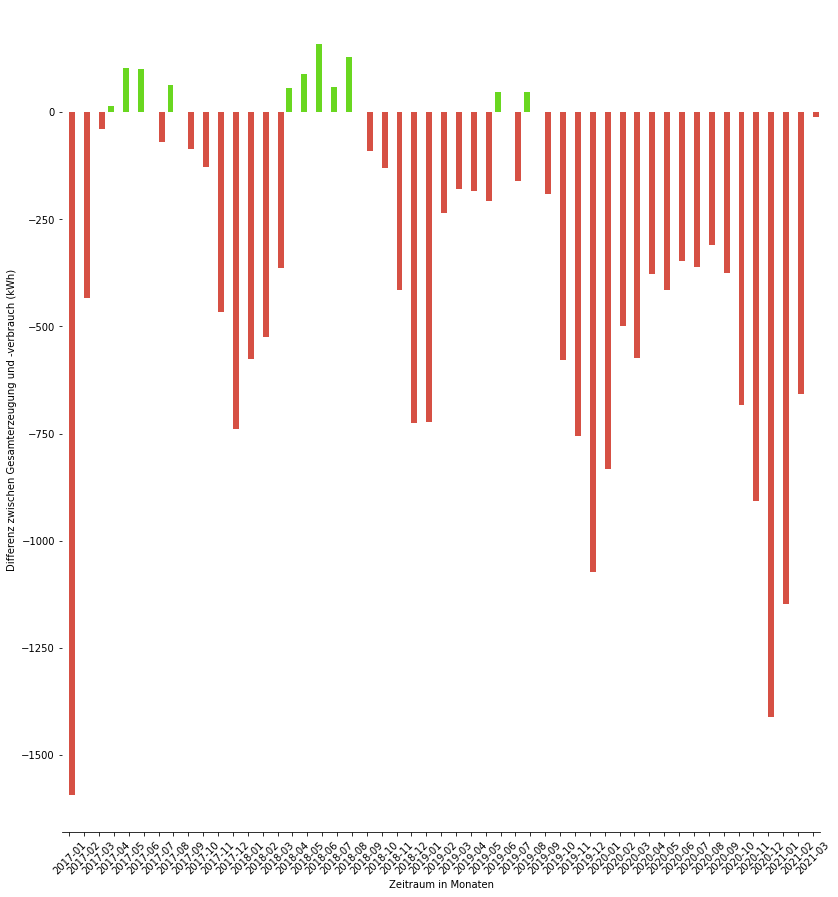

In [97]:
#sns.set_theme(style="whitegrid")
colors = [1 if c < 0 else 0 for c in dfx["Überschuss"]]
color = ["#63F502", "#EF3C2B", "#4374B3"]
#cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=dfx, kind="bar",
    x="Datum", y="Überschuss", 
    hue=colors,
    ci="sd", palette=color, alpha=1, height=12,
      

    
    
    
)
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]
#g.ax.axhline(225),
g.despine(left=True)
g.set_axis_labels("Zeitraum in Monaten", "Differenz zwischen Gesamterzeugung und -verbrauch (kWh)")
#g.legend.set_title("Überschussmengen")
g._legend.remove()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


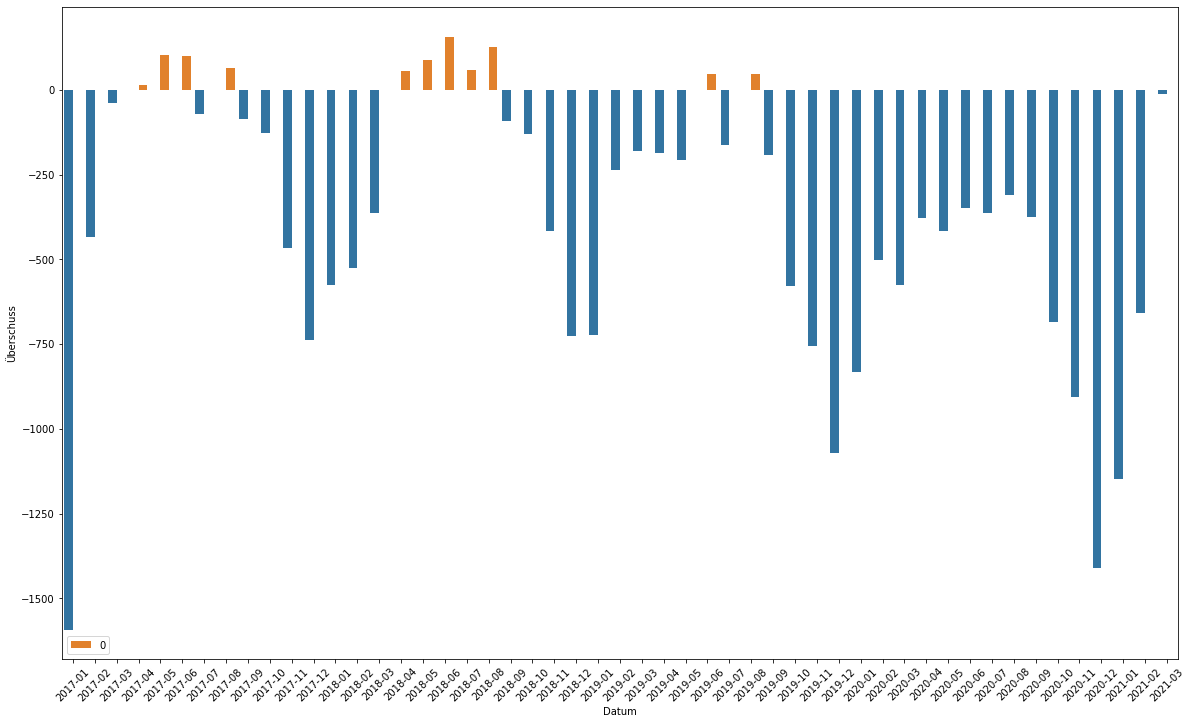

In [99]:
colors = ['' if c < 0 else 0 for c in dfx["Überschuss"]]
#data=df_mon
#x = df_mon["Datum"]
#y = df_mon["Überschuss"]

x = dfx["Datum"]
y = dfx["Überschuss"]
  
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 12))
  
# drawing the plot
sns.barplot(x, y, ax=ax, hue=colors)
plt.xticks(rotation=45)
plt.show()

In [100]:
#die obige Grafik stellt dar, stellt die Differenz zwischen Gesamterzeugung und -Verbrauch dar. Ist der Wert positiv dargestellt (blau), wurde mehr erzeugt als verbraucht - negative Werte sind rot dargestellt und zeigen an, wie viel kWh in dem Monat merh verbraucht als erzeugt wurden.

In [101]:
dfx= df_tag[['Jahr', 'Monat', 'Tag', 'FromGen', 'Überschuss']].copy()

In [102]:
#Kontrolle
#dfx.head()

# Nun soll das Potential der Überschussmengen erneut beleuchtet werden.

In [103]:
'''
Während eingangs immer die Differenz zwischen Erzeugung und Verbrauch über einen definierten Zeitraum untersucht wurde, sollen nun
nur die Messungen, in denen mehr erzeugt als verbraucht wurde, untersucht werden.
Hintergrund:
Diese Auswertung soll visualisieren, wie viel Überschuss für ein Ladesystem anfällt, wenn dieser eben nicht in einem Speicher gesammelt wird,
um später wieder dem Haushaltsverbrauch zugeführt wird.

Notwendige Energie wird also vom Netz bezogen und nicht durch frühere Überschüsse kompensiert, da diese dem Elektrofahrzeug zugeführt wird

Dazu wird das Feature "Mehrmenge" erzeugt, welches die Differenz zwischen der gesamten Erzeugungsmenge und dem Eigenverbrauch der Kunden darstellt
'''

'\nWährend eingangs immer die Differenz zwischen Erzeugung und Verbrauch über einen definierten Zeitraum untersucht wurde, sollen nun\nnur die Messungen, in denen mehr erzeugt als verbraucht wurde, untersucht werden.\nHintergrund:\nDiese Auswertung soll visualisieren, wie viel Überschuss für ein Ladesystem anfällt, wenn dieser eben nicht in einem Speicher gesammelt wird,\num später wieder dem Haushaltsverbrauch zugeführt wird.\n\nNotwendige Energie wird also vom Netz bezogen und nicht durch frühere Überschüsse kompensiert, da diese dem Elektrofahrzeug zugeführt wird\n\nDazu wird das Feature "Mehrmenge" erzeugt, welches die Differenz zwischen der gesamten Erzeugungsmenge und dem Eigenverbrauch der Kunden darstellt\n'

In [104]:
#df6 gibt alle Werte in Wh an, df7 in kWh (da gruppiert)
df6= df
#df.head()

In [105]:
df6['Mehrmenge']=df6['FromGen']-df6['FromGenToCons']

In [106]:
df6

DateTime  DevWork  FromBatToCons  FromGenToBat  \
0      2017-01-01 00:05:00+01:00      0.0            0.0           0.0   
1      2017-01-01 00:10:00+01:00      0.0            0.0           0.0   
2      2017-01-01 00:15:00+01:00      0.0            0.0           0.0   
3      2017-01-01 00:20:00+01:00      0.0            0.0           0.0   
4      2017-01-01 00:25:00+01:00      0.0            0.0           0.0   
...                          ...      ...            ...           ...   
438583 2021-03-03 20:40:00+01:00      0.0            0.0           0.0   
438584 2021-03-03 20:45:00+01:00      0.0            0.0           0.0   
438585 2021-03-03 20:50:00+01:00      0.0            0.0           0.0   
438586 2021-03-03 20:55:00+01:00      0.0            0.0           0.0   
438587 2021-03-03 21:00:00+01:00      0.0            0.0           0.0   

        FromGenToCons  FromGenToGrid  FromGridToCons  FromGrid  StateOfCharge  \
0                 0.0            0.0            49.0      49.0            NaN   
1                 0.0            0.0            49.0      49.0            NaN   
2                 0.0            0.0            60.0      60.0            NaN   
3                 0.0            0.0            58.0      58.0            NaN   
4                 0.0            0.0            33.0      33.0            NaN   
...               ...            ...             ...       ...            ...   
438583            0.0            0.0            98.0      98.0            NaN   
438584            0.0            0.0           131.0     131.0            NaN   
438585            0.0            0.0           110.0     110.0            NaN   
438586            0.0            0.0            95.0      95.0            NaN   
438587            0.0            0.0            64.0      64.0            NaN   

        ToCons  FromGen  Mehrmenge  
0         49.0      0.0        0.0  
1         49.0      0.0        0.0  
2         60.0      0.0        0.0  
3         58.0      0.0        0.0  
4         33.0      0.0        0.0  
...        ...      ...        ...  
438583    98.0      0.0        0.0  
438584   131.0      0.0        0.0  
438585   110.0      0.0        0.0  
438586    95.0      0.0        0.0  
438587    64.0      0.0        0.0  

[438588 rows x 12 columns]

In [107]:
#df7=df6

df7=df6.groupby(pd.Grouper(key='DateTime',freq='d')).sum().reset_index()


df7['Datum'] = pd.to_datetime(df7['DateTime']).dt.strftime('%Y-%m-%d')
df7['Jahr'] = pd.to_datetime(df7['DateTime']).dt.strftime('%Y')
df7['Monat'] = pd.to_datetime(df7['DateTime']).dt.strftime('%m')
df7['Tag'] = pd.to_datetime(df7['DateTime']).dt.strftime('%d')

#da die Features FromGenToBat  und FromBatToCons nicht in allen Anlagen vorhanden ist:
try:
    df7["FromBatToCons"] = df7["FromBatToCons"]/1000
except:
        pass
try:
    df7["FromGenToBat"] = df7["FromGenToBat"]/1000
except:
        pass
    
df7["FromGenToCons"] = df7["FromGenToCons"]/1000
df7["FromGenToGrid"] = df7["FromGenToGrid"]/1000
df7["FromGridToCons"] = df7["FromGridToCons"]/1000
df7["FromGrid"] = df7["FromGrid"]/1000
df7["ToCons"] = df7["ToCons"]/1000
df7["FromGen"] = df7["FromGen"]/1000
df7["Mehrmenge"]= df7["Mehrmenge"]/1000
del df7['DateTime']
try:
    del df7['DevWork']
except:
    pass
try:
    del df7['StateOfCharge']
except:
    pass



In [108]:
#del df7["mehrmenge"]
#df7 Mengen in kWh und nach Tag gruppiert
#Kontrolle
df7.head(500)

FromBatToCons  FromGenToBat  FromGenToCons  FromGenToGrid  \
0          0.27767       0.13273        3.21797        0.00800   
1          1.03427       0.96791        6.86500        0.12100   
2          0.71931       0.77271        4.42561        0.05500   
3          0.00000       0.00049        0.17822        0.00000   
4          0.00000       0.00000        0.07366        0.00000   
..             ...           ...            ...            ...   
495        2.99271       9.74126       11.32097       16.18127   
496        6.95097       7.67959       12.88163        8.77089   
497        6.55548       6.91912       10.54119       11.57996   
498        6.66343       1.51124        5.84210        0.11862   
499        6.50910       6.92752        6.90016        0.26250   

     FromGridToCons  FromGrid    ToCons   FromGen  Mehrmenge       Datum  \
0           26.5010    26.501  29.99671   3.35870    0.14073  2017-01-01   
1           51.2500    51.250  59.14930   7.95391    1.08891  2017-01-02   
2           51.7910    51.791  56.93600   5.25332    0.82771  2017-01-03   
3           65.3180    65.318  65.49623   0.17871    0.00049  2017-01-04   
4           85.6000    85.600  85.67367   0.07366    0.00000  2017-01-05   
..              ...       ...       ...       ...        ...         ...   
495          3.6040     3.604  17.91774  37.24350   25.92253  2018-05-11   
496          0.0630     0.063  19.89566  29.33211   16.45048  2018-05-12   
497          0.0500     0.050  17.14675  29.04027   18.49908  2018-05-13   
498          4.5270     4.527  17.03255   7.47196    1.62986  2018-05-14   
499         17.5159    17.516  30.92524  14.09018    7.19002  2018-05-15   

     Jahr Monat Tag  
0    2017    01  01  
1    2017    01  02  
2    2017    01  03  
3    2017    01  04  
4    2017    01  05  
..    ...   ...  ..  
495  2018    05  11  
496  2018    05  12  
497  2018    05  13  
498  2018    05  14  
499  2018    05  15  

[500 rows x 13 columns]

In [109]:
jahr_mehr=df7['Mehrmenge'].sum()
jahr_mehr



13246.96758

In [110]:
jahr_erz=df7['FromGen'].sum()
jahr_erz

26983.86376

In [111]:
#Da jetzt beide Dataframes vorbereitet sind, erfolgt nun die geplante Visualisierung der Daten:

In [112]:
#x=["2020-01-01","2017-05-22"]

def mymehrmenge():
    zeit = (df7['Datum'] > start_date) & (df7['Datum'] <= end_date)
    zeit = df7.loc[zeit]
    
    zeit.plot(figsize=(15,10),x="Datum", y=['Mehrmenge'])
    #df.plot(x="DateTime", y=["FromGen", "ToCons"])
    #plt.xticks(x)
    plt.xlabel("Zeit") 
    plt.ylabel("kWh")
    legend = plt.legend(title="Lastprofil", loc=1, fontsize='large', fancybox=True)
                       

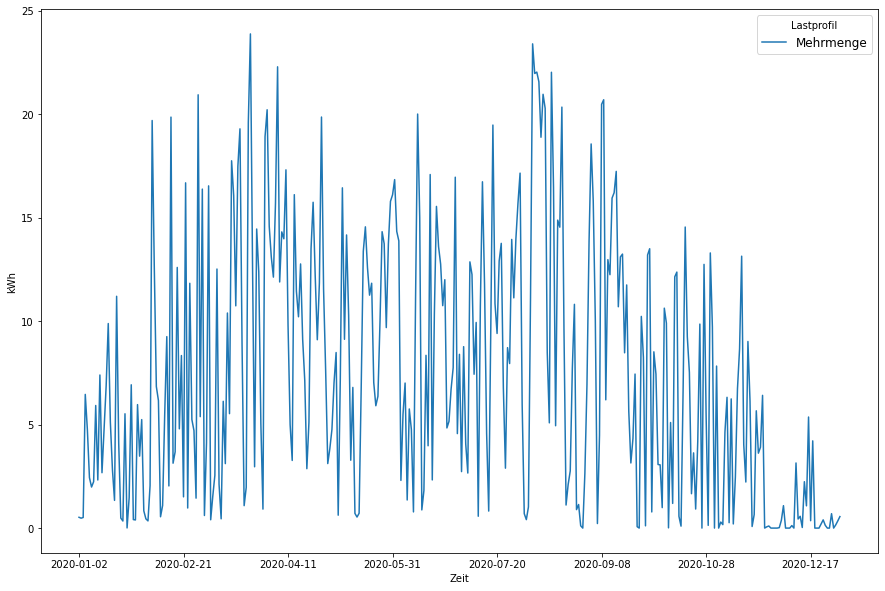

In [113]:
start_date="2020-01-01"
end_date="2020-12-31"
mymehrmenge()

In [114]:
# Gesamtübersicht Stromfluss pro Jahr:
#Dazu werden die gesamten Werte der Jahre 2017-2020 zusammengeführt und daraus der Durchschnitt gebildet:

In [115]:
df3=verbr_jahr_round

In [116]:
df3=df3.drop([4]) #2021 wieder entfernen, damit vier volle Jahre da sind
del df3["StateOfCharge"] #Dieses Feature kann man nicht als Summe übers Jahr nutzen
df3["Jahr"].to_string()
df4=df3.append(df3.mean(numeric_only=True), ignore_index=True)
df4.at[4,'Jahr'] = "Mittel"


In [117]:
df4

Jahr  FromBatToCons  FromGenToBat  FromGenToCons  FromGenToGrid  \
0    2017        1860.53     2036.3800      3068.3700        1505.55   
1    2018        1999.15     2165.5400      3215.3300        1420.22   
2    2019        1814.40     1993.2000      3177.3200        1182.01   
3    2020        1433.68     1615.7900      3907.3300        1089.98   
4  Mittel        1776.94     1952.7275      3342.0875        1299.44   

   FromGridToCons  FromGrid      ToCons   FromGen  
0        4954.520  4956.950   9883.4400  6610.300  
1        3925.960  3931.750   9140.4600  6801.090  
2        5559.500  5566.930  10551.2300  6352.530  
3        8371.840  8385.590  13712.8600  6613.100  
4        5702.955  5710.305  10821.9975  6594.255

In [118]:
#df5 ist nun ein Gesamtwert über alle Mengen in einem durchschnittlichen Jahr:
df5=df4.loc[[4]]
df5


Jahr  FromBatToCons  FromGenToBat  FromGenToCons  FromGenToGrid  \
4  Mittel        1776.94     1952.7275      3342.0875        1299.44   

   FromGridToCons  FromGrid      ToCons   FromGen  
4        5702.955  5710.305  10821.9975  6594.255

In [119]:
# SANKEY:

In [120]:
color_link=[
'#EBBAB5',
'#90EE90',
'#FEF3C7',
'#CBB4D5',
'#CBB4D5',
'#A6E3D7', 
]

color_node=[
'#d90d39',
'#A4C964',
'#FEF3C7',
#'#CBB4D5',
'#d90d39',
'#CBB4D5',
'#A6E3D7', 
]



#           0          1          2         3        4
label = ["FromGrid", "FromGen", "ToCons", "Grid", "Battery"]
source = [0, 1, 1, 1, 4]
target = [2, 2, 3, 4, 2]
value = [df5["FromGridToCons"], df5["FromGenToCons"], df5["FromGenToGrid"], df5["FromGenToBat"], df5["FromBatToCons"]]
# data to dict, dict to sankey
link = dict(source = source, target = target, value = value, color=color_link)
node = dict(label = label, pad=50, thickness=5, color=color_node)
data = go.Sankey(link = link, node=node)
# plot
fig = go.Figure(data)
fig.show()

In [121]:
#Dieses SANKEY-Diagramm visualisiert den Fluss an kWh in einem durchschnittlichem Jahr.

# Stromfluss mittels SANKEY-Diagramme für einzelne Tage/Monate:

In [122]:
#da wir das Sankey-Diagramm nun zu verschiedensten Zeiten vergleichen möchten, wird es in eine Funktion verpackt:

def mysankey():  
    label = ["FromGrid", "FromGen", "ToCons", "Grid", "Battery"]
    source = [0, 1, 1, 1, 4]
    target = [2, 2, 3, 4, 2]
    value = [dft["FromGridToCons"], dft["FromGenToCons"], dft["FromGenToGrid"], dft["FromGenToBat"], dft["FromBatToCons"]]
    # data to dict, dict to sankey
    link = dict(source = source, target = target, value = value, color=color_link)
    node = dict(label = label, pad=50, thickness=5, color=color_node)
    data = go.Sankey(link = link, node=node)
    # plot
    fig = go.Figure(data)
    fig.show()

In [123]:
# sankey für: 21.6.2020
dft=df_tag.loc[df_tag['Datum'] == '2020-06-21']
mysankey()

In [124]:
# sankey für Winter: 21.12.2020
dft=df_tag.loc[df_tag['Datum'] == '2020-12-21']
mysankey()

In [125]:
# sankey für Sommer: 21.6.2020
dft=df_tag.loc[df_tag['Datum'] == '2020-06-21']
mysankey()

In [126]:
# sankey für Jahr
dft=df4.loc[df4['Jahr'] == '2020']
mysankey()

# Sankey für Monate:

In [127]:
#df7.dtypes

In [128]:
#Kontrolle
#df7.head()

In [129]:
df8=df7.groupby(["Jahr", "Monat"]).sum().reset_index()
df8['Datum']=df8["Jahr"]+"-"+df8["Monat"]

In [130]:
df8.dtypes

Jahr               object
Monat              object
FromBatToCons     float64
FromGenToBat      float64
FromGenToCons     float64
FromGenToGrid     float64
FromGridToCons    float64
FromGrid          float64
ToCons            float64
FromGen           float64
Mehrmenge         float64
Datum              object
dtype: object

In [131]:
df8.head()

Jahr Monat  FromBatToCons  FromGenToBat  FromGenToCons  FromGenToGrid  \
0  2017    01       23.78575      25.93306       68.55543        3.60345   
1  2017    02      112.75558     122.41131      189.81121       69.35983   
2  2017    03      194.59258     216.49075      256.43989      202.98222   
3  2017    04      197.56621     218.83435      289.46281      199.89252   
4  2017    05      217.44428     238.70764      369.66058      261.76542   

   FromGridToCons  FromGrid      ToCons    FromGen  Mehrmenge    Datum  
0      1598.24365  1598.264  1690.58561   98.09194   29.53651  2017-01  
1       513.10195   513.204   815.67058  381.58235  191.77114  2017-02  
2       264.45195   264.452   715.48651  675.91286  419.47297  2017-03  
3       206.24843   206.570   693.27963  708.18968  418.72687  2017-04  
4       180.24005   180.357   767.34730  870.13364  500.47306  2017-05

In [132]:
def mysankey_monat():  
    label = ["FromGrid", "FromGen", "ToCons", "Grid", "Battery"]
    source = [0, 1, 1, 1, 4]
    target = [2, 2, 3, 4, 2]
    value = [dfm["FromGridToCons"], dfm["FromGenToCons"], dfm["FromGenToGrid"], dfm["FromGenToBat"], dfm["FromBatToCons"]]
    # data to dict, dict to sankey
    link = dict(source = source, target = target, value = value, color=color_link)
    node = dict(label = label, pad=50, thickness=5, color=color_node)
    data = go.Sankey(link = link, node=node)
    # plot
    fig = go.Figure(data)
    fig.show()

In [133]:
# sankey für Juni 2020
dfm=df8.loc[df8['Datum'] == '2017-05']
#mysankey_monat()

In [134]:
# SANKEY FÜR BELIEBIGES MONAT HIER EINGEBEN:
dfm=df8.loc[df8['Datum'] == '2020-11']
#mysankey_monat()

In [135]:
#dfx.head()

In [136]:
#Für Jahre:

In [137]:
dfj=df7.groupby(["Jahr"]).sum().reset_index()
dfj

Jahr  FromBatToCons  FromGenToBat  FromGenToCons  FromGenToGrid  \
0  2017     1860.53308    2036.38081     3068.36910     1505.55064   
1  2018     1999.15247    2165.54323     3215.32819     1420.22217   
2  2019     1814.39734    1993.19808     3177.32107     1182.00839   
3  2020     1433.68420    1615.79300     3907.32614     1089.97839   
4  2021      160.85989     173.52335      368.55168       64.76952   

   FromGridToCons    FromGrid       ToCons     FromGen   Mehrmenge  
0      4954.51826  4956.94700   9883.43947  6610.30055  3541.93145  
1      3925.96293  3931.75198   9140.45969  6801.09359  3585.76540  
2      5559.49539  5566.93104  10551.23166  6352.52754  3175.20647  
3      8371.83677  8385.58504  13712.86249  6613.09753  2705.77139  
4      1896.85814  1904.92000   2426.27139   606.84455   238.29287

In [170]:
'JAHR AUSWÄHLEN'
dfm=dfj.loc[dfj['Jahr'] == '2020']
#mysankey_monat()

In [139]:
##Einzelne zufällige Tage:

In [171]:
#''' 
#GO IST WIEDER AUSKOMMENTIERT!
x = df["DateTime"]
y = df["FromGen"]
y = df["ToCons"]

fig = go.Figure(data=go.Scatter(x=x, y=y), layout_xaxis_range=["2017-06-25", "2017-06-30"])

'''fig.add_shape(type='line',
                x0=min(x),
                y0=0,
                x1=max(x),
                y1=0,
                line=dict(color='Red',),
                xref='x',
                #yref='y'
                
)'''

#fig.show()

#'''

"fig.add_shape(type='line',\n                x0=min(x),\n                y0=0,\n                x1=max(x),\n                y1=0,\n                line=dict(color='Red',),\n                xref='x',\n                #yref='y'\n                \n)"

In [141]:
#'''
#AUFGURND DER EXTERM SCHLECHTEN PERFOMANZ von Plotly Graphical Objects bei solch einer enormen Menge an Werten, wurde dieser Plot entfernt:
fig = go.Figure([
    
    go.Scatter(
        name='Erzeugung',
        x=df['DateTime'],
        y=df['FromGen'],
        mode='markers+lines',
        marker=dict(color='red', size=2),
        showlegend=True
    ),
    go.Scatter(
        name='Verbrauch',
        x=df['DateTime'],
        y=df['ToCons'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=1),
        showlegend=False
    )])
#fig.update_layout(
#layout_xaxis_range=["2017-06-25", "2017-06-30"])

#'''

In [142]:
#fig.show()

In [143]:
##Wenn es sich um eine Anlage mit vorhandenem Batteriespeicher handelt, soll dieser abschließend hier auch noch untersucht werden:

In [144]:
if 'StateOfCharge' in df:
   print("True") 
else:
    print("Die Anlage besitzt keinen Batteriespeicher")

True


In [145]:
#df.head()

In [146]:
df_bat=df
df_bat['Datum'] = pd.to_datetime(df_bat['DateTime']).dt.strftime('%Y-%m')

In [147]:
'''
#GO AUSKOMMENTIERT!
x = df["Datum"]
y = df_bat["StateOfCharge"]

fig = go.Figure(data=go.Scatter(x=x, y=y), layout_xaxis_range=["2019-06-01", "2019-08-15"])

fig.add_shape(type='line',
                x0=min(x),
                y0=0,
                x1=max(x),
                y1=0,
                line=dict(color='Red',),
                xref='x',
                #yref='y'
)

fig.show()

'''

'\n#GO AUSKOMMENTIERT!\nx = df["Datum"]\ny = df_bat["StateOfCharge"]\n\nfig = go.Figure(data=go.Scatter(x=x, y=y), layout_xaxis_range=["2019-06-01", "2019-08-15"])\n\nfig.add_shape(type=\'line\',\n                x0=min(x),\n                y0=0,\n                x1=max(x),\n                y1=0,\n                line=dict(color=\'Red\',),\n                xref=\'x\',\n                #yref=\'y\'\n)\n\nfig.show()\n\n'

In [148]:
df_bat.set_index('DateTime')

DevWork  FromBatToCons  FromGenToBat  \
DateTime                                                          
2017-01-01 00:05:00+01:00      0.0            0.0           0.0   
2017-01-01 00:10:00+01:00      0.0            0.0           0.0   
2017-01-01 00:15:00+01:00      0.0            0.0           0.0   
2017-01-01 00:20:00+01:00      0.0            0.0           0.0   
2017-01-01 00:25:00+01:00      0.0            0.0           0.0   
...                            ...            ...           ...   
2021-03-03 20:40:00+01:00      0.0            0.0           0.0   
2021-03-03 20:45:00+01:00      0.0            0.0           0.0   
2021-03-03 20:50:00+01:00      0.0            0.0           0.0   
2021-03-03 20:55:00+01:00      0.0            0.0           0.0   
2021-03-03 21:00:00+01:00      0.0            0.0           0.0   

                           FromGenToCons  FromGenToGrid  FromGridToCons  \
DateTime                                                                  
2017-01-01 00:05:00+01:00            0.0            0.0            49.0   
2017-01-01 00:10:00+01:00            0.0            0.0            49.0   
2017-01-01 00:15:00+01:00            0.0            0.0            60.0   
2017-01-01 00:20:00+01:00            0.0            0.0            58.0   
2017-01-01 00:25:00+01:00            0.0            0.0            33.0   
...                                  ...            ...             ...   
2021-03-03 20:40:00+01:00            0.0            0.0            98.0   
2021-03-03 20:45:00+01:00            0.0            0.0           131.0   
2021-03-03 20:50:00+01:00            0.0            0.0           110.0   
2021-03-03 20:55:00+01:00            0.0            0.0            95.0   
2021-03-03 21:00:00+01:00            0.0            0.0            64.0   

                           FromGrid  StateOfCharge  ToCons  FromGen  \
DateTime                                                              
2017-01-01 00:05:00+01:00      49.0            NaN    49.0      0.0   
2017-01-01 00:10:00+01:00      49.0            NaN    49.0      0.0   
2017-01-01 00:15:00+01:00      60.0            NaN    60.0      0.0   
2017-01-01 00:20:00+01:00      58.0            NaN    58.0      0.0   
2017-01-01 00:25:00+01:00      33.0            NaN    33.0      0.0   
...                             ...            ...     ...      ...   
2021-03-03 20:40:00+01:00      98.0            NaN    98.0      0.0   
2021-03-03 20:45:00+01:00     131.0            NaN   131.0      0.0   
2021-03-03 20:50:00+01:00     110.0            NaN   110.0      0.0   
2021-03-03 20:55:00+01:00      95.0            NaN    95.0      0.0   
2021-03-03 21:00:00+01:00      64.0            NaN    64.0      0.0   

                           Mehrmenge    Datum  
DateTime                                       
2017-01-01 00:05:00+01:00        0.0  2017-01  
2017-01-01 00:10:00+01:00        0.0  2017-01  
2017-01-01 00:15:00+01:00        0.0  2017-01  
2017-01-01 00:20:00+01:00        0.0  2017-01  
2017-01-01 00:25:00+01:00        0.0  2017-01  
...                              ...      ...  
2021-03-03 20:40:00+01:00        0.0  2021-03  
2021-03-03 20:45:00+01:00        0.0  2021-03  
2021-03-03 20:50:00+01:00        0.0  2021-03  
2021-03-03 20:55:00+01:00        0.0  2021-03  
2021-03-03 21:00:00+01:00        0.0  2021-03  

[438588 rows x 12 columns]

In [149]:
df_bat = df_bat.dropna()

In [150]:
##Potential zum Laden beim Pendeln:

line1 = "2019-06-18 07:00:00"
line2 = "2019-06-18 17:00:00"

ax.axvspan(line1, line2, alpha=.5, color='red')

plt.show()

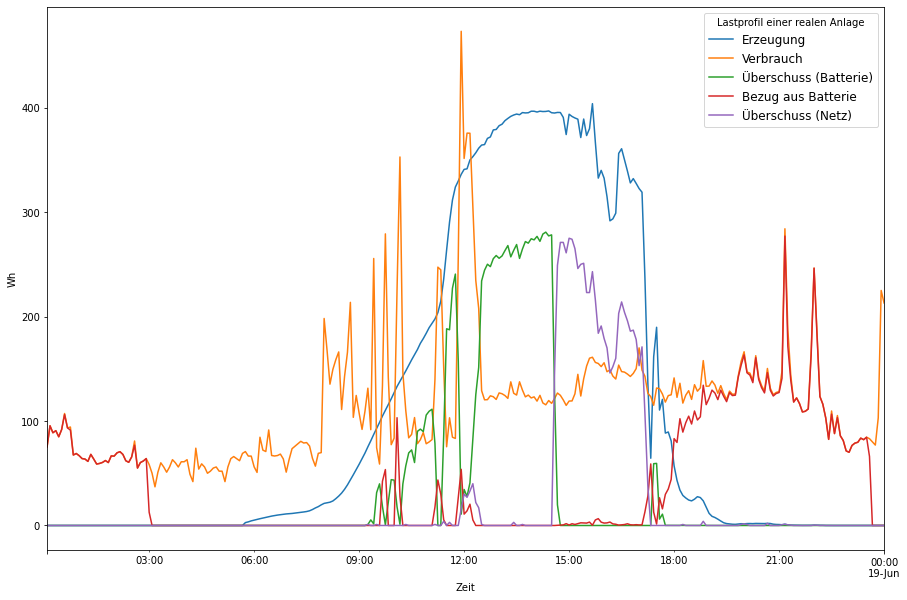

In [174]:
start_date="2019-06-18"
end_date="2019-06-19"

zeit = (df['DateTime'] > start_date) & (df['DateTime'] <= end_date)
zeit = df.loc[zeit]

zeit.plot(figsize=(15,10),x="DateTime", y=["FromGen", "ToCons", "FromGenToBat", "FromBatToCons", "FromGenToGrid"])
plt.xlabel("Zeit") 
plt.ylabel("Wh")
legend = plt.legend(title="Lastprofil einer realen Anlage",
                    loc=1, fontsize='large', fancybox=True, labels=['Erzeugung', 'Verbrauch', 'Überschuss (Batterie)', "Bezug aus Batterie", "Überschuss (Netz)"])

plt.show()

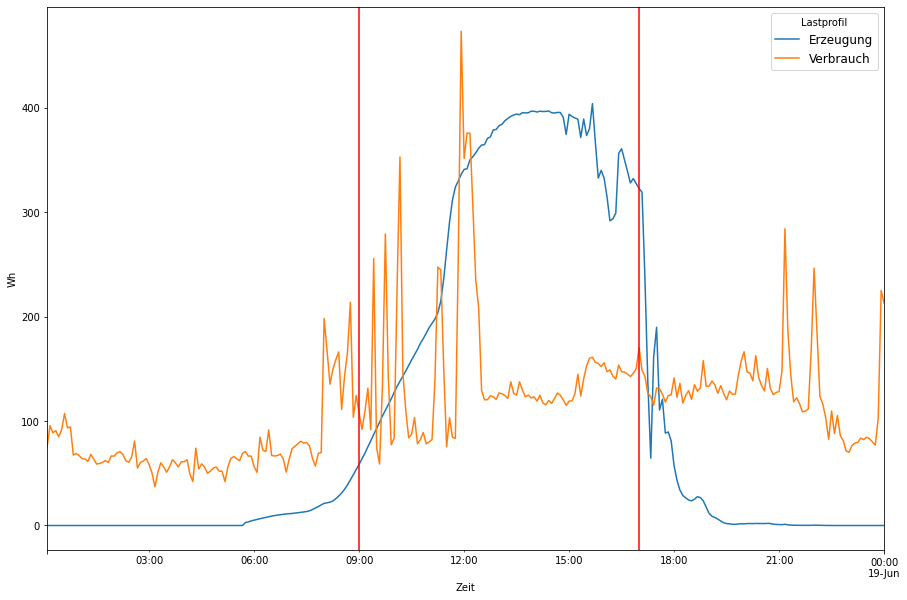

In [152]:
start_date="2019-06-18"
end_date="2019-06-19"

x0='2019-06-18 9:00:00'
x1='2019-06-18 17:00:00'

x0= pd.to_datetime(x0, format="%Y-%m-%d", utc=True)
x1= pd.to_datetime(x1, format="%Y-%m-%d", utc=True)

zeit = (df['DateTime'] > start_date) & (df['DateTime'] <= end_date)
zeit = df.loc[zeit]

zeit.plot(figsize=(15,10),x="DateTime", y=["FromGen", "ToCons"])
plt.xlabel("Zeit") 
plt.ylabel("Wh")
legend = plt.legend(title="Lastprofil",
                    loc=1, fontsize='large', fancybox=True,  labels=['Erzeugung', 'Verbrauch'])
plt.axvline(x=x0, color='red')
plt.axvline(x=x1, color='red')

ax.fill_between(zeit['DateTime'].values, zeit['FromGen'], zeit['ToCons'],
                where=(zeit['FromGen'] > zeit['ToCons']) & ((zeit['DateTime'] <= x0) | (zeit['DateTime'] >= x1)),
                interpolate=False, color='#8FF536')

#plt.axvline(x=0.33088437)
plt.show()

In [153]:
zeit.head(140)

DateTime   DevWork  FromBatToCons  FromGenToBat  \
258612 2019-06-18 00:05:00+02:00  251168.0          75.26          0.00   
258613 2019-06-18 00:10:00+02:00  322624.0          95.48          0.00   
258614 2019-06-18 00:15:00+02:00  298969.0          88.77          0.00   
258615 2019-06-18 00:20:00+02:00  305967.0          90.78          0.00   
258616 2019-06-18 00:25:00+02:00  285566.0          84.93          0.00   
...                          ...       ...            ...           ...   
258747 2019-06-18 11:20:00+02:00  836586.0          30.02          0.00   
258748 2019-06-18 11:25:00+02:00  518403.0           5.38         86.26   
258749 2019-06-18 11:30:00+02:00  231321.0           0.00        188.31   
258750 2019-06-18 11:35:00+02:00  327952.0           0.00        187.36   
258751 2019-06-18 11:40:00+02:00  260359.0           0.00        227.07   

        FromGenToCons  FromGenToGrid  FromGridToCons  FromGrid  StateOfCharge  \
258612           0.00            0.0             0.0       0.0           35.0   
258613           0.00            0.0             0.0       0.0           34.0   
258614           0.00            0.0             0.0       0.0           33.0   
258615           0.00            0.0             0.0       0.0           32.0   
258616           0.00            0.0             0.0       0.0           31.0   
...               ...            ...             ...       ...            ...   
258747         214.68            0.0             0.0       0.0           17.0   
258748         145.56            4.0             0.0       0.0           18.0   
258749          75.37            0.0             0.0       0.0           19.0   
258750         100.10            3.0             3.0       3.0           21.0   
258751          84.49            0.0             0.0       0.0           24.0   

        ToCons  FromGen  Mehrmenge    Datum  
258612   75.26     0.00       0.00  2019-06  
258613   95.48     0.00       0.00  2019-06  
258614   88.77     0.00       0.00  2019-06  
258615   90.78     0.00       0.00  2019-06  
258616   84.93     0.00       0.00  2019-06  
...        ...      ...        ...      ...  
258747  244.71   214.68       0.00  2019-06  
258748  150.95   235.82      90.26  2019-06  
258749   75.37   263.68     188.31  2019-06  
258750  103.10   290.46     190.36  2019-06  
258751   84.49   311.56     227.07  2019-06  

[140 rows x 13 columns]

In [154]:
#Wir kopieren den ursprünglichen DF für den nächsten Plot (Timezone muss angepasst werden)
df_time=df.copy()
df_time['DateTime'] = pd.to_datetime(df_time['DateTime'], format="%Y-%m-%d", utc=True)
#df_time['DateTime'] = df_time['DateTime'].dt.tz_convert('Europe/Berlin')

#Timezone anpassen:
from datetime import datetime
from pytz import timezone
from datetime import datetime, timedelta


df_time['DateTime'] = df_time['DateTime'] + timedelta(hours=2)
df_time['DateTime'] = df_time['DateTime'].dt.tz_convert('utc')

# BEV Potential visualisiert

In [155]:
#hier können jetzt Zeiten definiert werden, an denen das Fahrzeug nicht am Netz hängt.

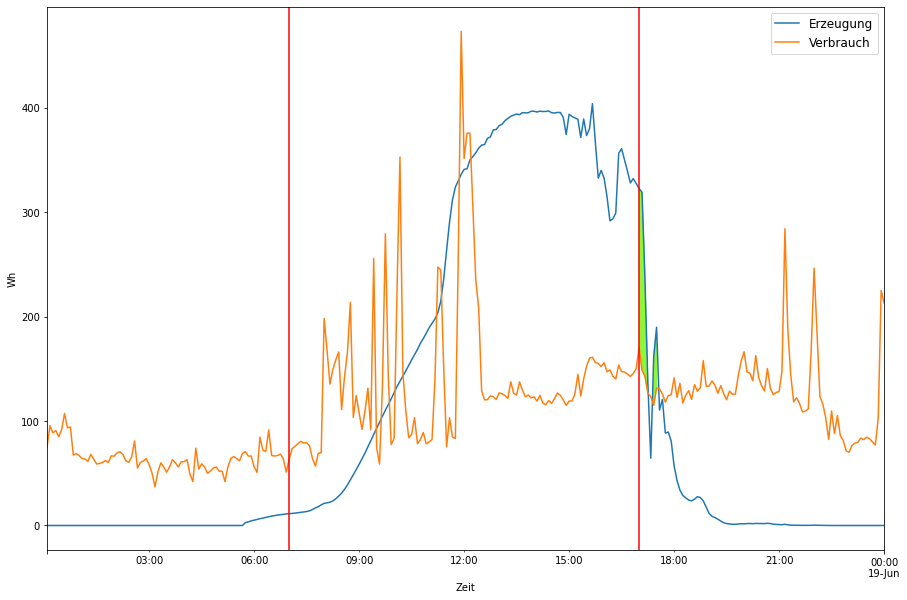

In [156]:
#Zeitraum der ausgewertet werden soll:
start_date = "2019-06-18"
end_date = "2019-06-19"

#Von-Bis ist das BEV nicht an der ladesäule:
time1="7:00:00"
time2="17:00:00"

x0 = start_date+" "+time1
x1 = start_date+" "+time2


zeit = df_time.loc[(df_time['DateTime'] > start_date) & (df_time['DateTime'] <= end_date)]


ax = zeit.plot(figsize=(15, 10), x="DateTime", y=["FromGen", "ToCons"])

ax.set_xlabel("Zeit")
ax.set_ylabel("Wh")
legend = ax.legend(title="",
                   loc='upper right', fontsize='large', fancybox=True, labels=['Erzeugung', 'Verbrauch'])
ax.axvline(x=x0, color='red')
ax.axvline(x=x1, color='red')


ax.fill_between(zeit['DateTime'].values, zeit['FromGen'], zeit['ToCons'],
                where=((zeit['FromGen'] > zeit['ToCons']) & ((zeit['DateTime'] <= x0) | (zeit['DateTime'] >=x1))),
                interpolate=False, color='#8FF536')
plt.show()

In [157]:
#df

In [158]:
#df_time